# Part 0.1: Software Versions Used

In [1]:
import numpy as np; np.__version__

'1.9.3'

In [2]:
import scipy; print scipy.__version__

0.16.0


In [3]:
%matplotlib inline

In [4]:
import matplotlib; print matplotlib.__version__

1.4.3


In [5]:
import sklearn; print sklearn.__version__

0.16.1


In [6]:
import IPython; print IPython.__version__

4.0.0


In [7]:
import jupyter; print jupyter.__version__

1.0.0


## WND-CHARM version used

In [8]:
import wndcharm; print wndcharm.__version__

0.9.10


# Part 0.2: Current data

In [9]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier'

In [10]:
ls

CElegans_CuticleClassifier_Scanning_Window.ipynb  TrainAllTestSubsetN25.txt                         out.fit
CuticleTrainedClassifier.fit                      generate_sliding_window_features.py               trainingset1/
ParseHTML.pl*                                     old_analyses/                                     trainingset2/


In [11]:
cd trainingset2/

/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2


In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [13]:
num_example_imgs_per_class = 3

In [14]:
from os import walk
from os.path import sep
root, dirs, files = walk('.').next()
example_files = []
for _dir in dirs:
    if _dir.startswith( '.'):
        continue
    sub_root, sub_dirs, sub_files = walk( _dir ).next()
    sub_files = [ _ for _ in sub_files if _.endswith( (".tif", ".tiff", ".TIF", ".TIFF" ) ) ]
    for i in xrange( num_example_imgs_per_class ):
        img_path = sub_root + sep + sub_files[i]
        example_files.append( img_path )

In [15]:
i = 0

moreGray/Day1_070000-1_003.tif


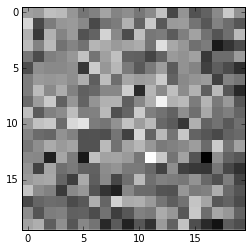

In [24]:
img_path = example_files[i]
print img_path
img = plt.imread( img_path )
plt.imshow( img, cmap=cm.Greys_r, interpolation='none')
i += 1

# Section 1: Standard WND-CHARM Analysis

In [25]:
from wndcharm.FeatureSpace import FeatureSpace

In [26]:
#fs = FeatureSpace.NewFromDirectory( '.', long=True, quiet=True )
#fs = FeatureSpace.NewFromFileOfFiles( 'fof.tsv', long=True, quiet=True )
fs = FeatureSpace.NewFromFitFile( 'out.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE out.fit: <FeatureSpace "out.fit" n_features=2919 n_total_samples=1502 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 533, "moreCuticle": 580, "moreGray": 389)>


## Section 1.1: Training accuracy ("fit-on-fit")

In [27]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [28]:
fs_norm = fs.Normalize( inplace=False )

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "out.fit" n_features=2919 n_total_samples=1502 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 533, "moreCuticle": 580, "moreGray": 389)>


In [29]:
fw = FisherFeatureWeights.NewFromFeatureSpace( fs_norm).Threshold( _all=True )

In [30]:
fw.Print(10)

FisherFeatureWeights (2919 features)
Rank	Value	Name
====	=====	====
1	38.704486	Zernike Coefficients (Fourier ()) [20]
2	32.278101	Haralick Textures (Fourier ()) [8]
3	30.962991	Zernike Coefficients (Fourier ()) [49]
4	30.573888	Haralick Textures (Fourier ()) [22]
5	30.128843	Haralick Textures (Chebyshev (Fourier ())) [10]
6	29.315145	Zernike Coefficients (Fourier ()) [12]
7	28.112983	Haralick Textures (Fourier ()) [10]
8	26.542998	Haralick Textures (Chebyshev (Fourier ())) [0]
9	24.849628	Zernike Coefficients (Fourier ()) [64]
10	23.427565	Haralick Textures (Fourier ()) [18]
<output truncated by user via "display" arg, 2909 more feature weights>


In [31]:
fw.Print(50)

FisherFeatureWeights (2919 features)
Rank	Value	Name
====	=====	====
1	38.704486	Zernike Coefficients (Fourier ()) [20]
2	32.278101	Haralick Textures (Fourier ()) [8]
3	30.962991	Zernike Coefficients (Fourier ()) [49]
4	30.573888	Haralick Textures (Fourier ()) [22]
5	30.128843	Haralick Textures (Chebyshev (Fourier ())) [10]
6	29.315145	Zernike Coefficients (Fourier ()) [12]
7	28.112983	Haralick Textures (Fourier ()) [10]
8	26.542998	Haralick Textures (Chebyshev (Fourier ())) [0]
9	24.849628	Zernike Coefficients (Fourier ()) [64]
10	23.427565	Haralick Textures (Fourier ()) [18]
11	22.497717	Zernike Coefficients (Fourier ()) [30]
12	20.983096	Zernike Coefficients (Fourier ()) [26]
13	17.885480	Zernike Coefficients (Fourier ()) [37]
14	16.946825	Zernike Coefficients (Fourier ()) [58]
15	16.642873	Zernike Coefficients (Fourier ()) [13]
16	15.679896	Zernike Coefficients (Fourier ()) [6]
17	14.889053	Haralick Textures (Chebyshev (Fourier ())) [22]
18	14.812823	Zernike Coefficients (Fourier (

In [32]:
reduced_fw = fw.Threshold()

In [33]:
reduced_fw

<FisherFeatureWeights n_features=437 feat0="Zernike Coefficients (Fourier ()) [20]" val0=38.7044858121>

In [34]:
reduced_fs = fs_norm.FeatureReduce( reduced_fw, inplace=False )

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "out.fit (feature reduced)" n_features=437 n_total_samples=1502 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 533, "moreCuticle": 580, "moreGray": 389)>:'


In [35]:
from wndcharm.FeatureSpacePrediction import FeatureSpaceClassification

In [36]:
table1_1 = FeatureSpaceClassification.NewWND5( reduced_fs, reduced_fs, reduced_fw, quiet=True, name="Table 1-1: Fit on Fit" )

In [37]:
table1_1.Print()

FeatureSpaceClassification "Table 1-1: Fit on Fit" (1502 classifications)
1485/1502 correct = 98.87%


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	519	13	1	|	533	97.37%
moreCuticle	3	577	0	|	580	99.48%
moreGray	0	0	389	|	389	100.00%

Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.10	0.00	
moreCuticle	0.04	1.00	0.00	
moreGray	0.00	0.00	1.00	

Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9068	0.0913	0.0019	
moreCuticle	0.0362	0.9638	0.0000	
moreGray	0.0012	0.0000	0.9988	



## Section 1.2: Cross-validation WITHOUT LDA

In [38]:
from wndcharm.FeatureSpacePredictionExperiment import FeatureSpaceClassificationExperiment

In [39]:
exp = FeatureSpaceClassificationExperiment.NewShuffleSplit( fs, n_iter=100, random_state=42 )

iter	split class acc.
0	1.0
1	0.989795918367
2	0.989795918367
3	0.986394557823
4	0.986394557823
5	0.986394557823
6	0.996598639456
7	0.986394557823
8	0.989795918367
9	0.982993197279
10	0.97619047619
11	0.993197278912
12	0.989795918367
13	0.989795918367
14	0.993197278912
15	0.986394557823
16	0.993197278912
17	0.996598639456
18	0.982993197279
19	0.986394557823
20	0.993197278912
21	0.986394557823
22	0.993197278912
23	0.989795918367
24	0.996598639456
25	0.989795918367
26	0.993197278912
27	0.989795918367
28	0.996598639456
29	0.982993197279
30	0.986394557823
31	0.986394557823
32	0.993197278912
33	0.996598639456
34	0.996598639456
35	0.986394557823
36	0.979591836735
37	0.986394557823
38	0.993197278912
39	0.996598639456
40	0.97619047619
41	0.996598639456
42	0.989795918367
43	0.993197278912
44	0.969387755102
45	0.982993197279
46	0.982993197279
47	0.986394557823
48	0.986394557823
49	0.993197278912
50	0.993197278912
51	0.993197278912
52	0.986394557823
53	0.989795918367
54	0.989795918367
55	0.986394

In [40]:
exp.Print()

FeatureSpaceClassificationExperiment "out.fit (sorted)" (100 iterations)
29081/29400 correct = 98.91 +/- 0.12% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	9544	227	29	|	9800	97.39%
moreCuticle	55	9745	0	|	9800	99.44%
moreGray	8	0	9792	|	9800	99.92%


Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.10	0.00	
moreCuticle	0.04	1.00	0.00	
moreGray	0.00	0.00	1.00	


Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9101	0.0869	0.0030	
moreCuticle	0.0374	0.9626	0.0000	
moreGray	0.0017	0.0000	0.9983	


Feature Weight Analysis (top 20 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	39.514	100	2.691	35.297	52.552	Zernike Coefficients (Fourier ()) [20]
2	31.431	100	1.599	28.494	35.

# Section 1.2: X-val WITH LDA

In [41]:
exp = FeatureSpaceClassificationExperiment.NewShuffleSplit( fs, n_iter=100, lda=True, random_state=42 )

iter	split class acc.
0	0.996598639456
1	1.0
2	0.989795918367
3	0.986394557823
4	0.996598639456
5	0.996598639456
6	0.996598639456
7	0.989795918367
8	0.989795918367
9	0.989795918367
10	0.993197278912
11	0.986394557823
12	0.996598639456
13	0.989795918367
14	0.996598639456
15	0.989795918367
16	0.996598639456
17	0.993197278912
18	0.993197278912
19	0.989795918367
20	0.996598639456
21	1.0
22	0.993197278912
23	0.996598639456
24	0.996598639456
25	0.996598639456
26	0.996598639456
27	0.993197278912
28	0.989795918367
29	0.996598639456
30	0.982993197279
31	1.0
32	1.0
33	0.996598639456
34	0.996598639456
35	0.993197278912
36	0.989795918367
37	0.993197278912
38	1.0
39	1.0
40	0.993197278912
41	0.989795918367
42	0.996598639456
43	1.0
44	0.982993197279
45	0.989795918367
46	0.993197278912
47	0.993197278912
48	0.996598639456
49	0.996598639456
50	1.0
51	0.996598639456
52	0.996598639456
53	1.0
54	0.989795918367
55	0.996598639456
56	0.996598639456
57	1.0
58	0.993197278912
59	0.989795918367
60	0.989795918367


In [42]:
exp.Print()

Displaying feature weight statistics for all 2 features
FeatureSpaceClassificationExperiment "out.fit (sorted)" (100 iterations)
29217/29400 correct = 99.38 +/- 0.09% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	9703	68	29	|	9800	99.01%
moreCuticle	45	9755	0	|	9800	99.54%
moreGray	41	0	9759	|	9800	99.58%


Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.01	0.00	
moreCuticle	0.01	1.00	0.00	
moreGray	0.00	0.00	1.00	


Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9896	0.0074	0.0030	
moreCuticle	0.0053	0.9947	0.0000	
moreGray	0.0042	0.0000	0.9957	


Feature Weight Analysis (top 2 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	1.000	100	0.000	1.000	1.000	LDAcomponent2
2	

## Section 1.3: Num samples classifier saturation grid search

Using top 15% of features by default

In [44]:
params = {}
params['feature_space'] = fs
params['quiet'] = False
params['n_iter'] = 100
params['param_space'] = 20
params['random_state'] = 42

In [45]:
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [3, 4, 6, 8, 11, 15, 20, 27, 36, 48, 65, 88, 118, 159, 214, 289, 388]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
3	0.77
4	0.856666666667
6	0.93
8	0.933333333333
11	0.956666666667
15	0.956666666667
20	0.976666666667
27	0.976666666667
36	0.98
48	0.973333333333
65	0.983333333333
88	0.986666666667
118	0.983333333333
159	0.993333333333
214	0.983333333333
289	0.99
388	0.993333333333


In [46]:
params['lda']=True
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [3, 4, 6, 8, 11, 15, 20, 27, 36, 48, 65, 88, 118, 159, 214, 289, 388]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
3	0.223333333333
4	0.813333333333
6	0.85
8	0.483333333333
11	0.63
15	0.833333333333
20	0.91
27	0.983333333333
36	0.98
48	0.983333333333
65	0.996666666667
88	0.986666666667
118	0.946666666667
159	0.943333333333
214	0.983333333333
289	0.98
388	0.996666666667


/usr/local/lib/python2.7/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


## Section 1.4: Num features classifier saturation grid search w/ optimized # samples

150 samples/class gets you to 99% classification accuracy

In [47]:
train_set = fs.Split(train_size=150, test_size=0, random_state=42)

SPLIT FEATURE SPACE INTO TRAINING SET:  <FeatureSpace "out.fit (subset) (sorted)" n_features=2919 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>


In [48]:
params = {}
params['feature_space'] = train_set
params['quiet'] = False
params['n_iter'] = 100
params['param_space'] = 20
params['random_state'] = 42

In [49]:
FeatureSpaceClassificationExperiment.NumFeaturesGridSearch( **params )

Using num features param space of : [1, 2, 3, 5, 7, 11, 16, 24, 36, 54, 81, 120, 179, 266, 397, 592, 882, 1314, 1959, 2919]
FEATURE WEIGHT GRID SEARCH RESULTS:
n features	 figure of merit
1	0.749473684211
2	0.791666666667
3	0.808947368421
5	0.834122807018
7	0.835526315789
11	0.832192982456
16	0.877807017544
24	0.921666666667
36	0.97701754386
54	0.977543859649
81	0.977894736842
120	0.985877192982
179	0.985789473684
266	0.985964912281
397	0.985877192982
592	0.985877192982
882	0.985964912281
1314	0.985964912281
1959	0.985964912281
Skipping n_features=2919 and above due to feature reduction error


[(1, 0.7494736842105263),
 (2, 0.7916666666666666),
 (3, 0.8089473684210526),
 (5, 0.8341228070175438),
 (7, 0.8355263157894737),
 (11, 0.8321929824561404),
 (16, 0.8778070175438597),
 (24, 0.9216666666666666),
 (36, 0.9770175438596491),
 (54, 0.9775438596491228),
 (81, 0.9778947368421053),
 (120, 0.9858771929824561),
 (179, 0.9857894736842105),
 (266, 0.9859649122807017),
 (397, 0.9858771929824561),
 (592, 0.9858771929824561),
 (882, 0.9859649122807017),
 (1314, 0.9859649122807017),
 (1959, 0.9859649122807017)]

## Section 1.5: Num samples classifier saturation grid search w/ optimized # features

120 features gets you to 98% classification accuracy

In [50]:
params = {}
params['feature_space'] = fs
params['quiet'] = False
params['n_iter'] = 100
params['param_space'] = 20
params['random_state'] = 42
params['features_size'] = 120

In [51]:
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [3, 4, 6, 8, 11, 15, 20, 27, 36, 48, 65, 88, 118, 159, 214, 289, 388]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
3	0.763333333333
4	0.84
6	0.926666666667
8	0.926666666667
11	0.946666666667
15	0.95
20	0.97
27	0.973333333333
36	0.976666666667
48	0.976666666667
65	0.983333333333
88	0.983333333333
118	0.986666666667
159	0.993333333333
214	0.983333333333
289	0.983333333333
388	0.996666666667


Conclusion: 50 samples/class result is stable when reducing num_features to 30 from default 438. Save Training set to file.

Question are the features that are top ranked the same during cross validation as well as straight fit on fit?

In [52]:
exp = FeatureSpaceClassificationExperiment.NewShuffleSplit( train_set, features_size=120, n_iter=100, random_state=42)

iter	split class acc.
0	0.964912280702
1	0.982456140351
2	0.991228070175
3	0.973684210526
4	0.973684210526
5	0.982456140351
6	0.991228070175
7	1.0
8	0.973684210526
9	0.991228070175
10	0.991228070175
11	0.982456140351
12	0.991228070175
13	0.982456140351
14	0.982456140351
15	0.982456140351
16	0.991228070175
17	0.991228070175
18	0.956140350877
19	0.982456140351
20	0.991228070175
21	0.982456140351
22	0.982456140351
23	0.973684210526
24	0.991228070175
25	0.991228070175
26	0.982456140351
27	0.982456140351
28	0.991228070175
29	1.0
30	0.991228070175
31	0.973684210526
32	0.991228070175
33	0.991228070175
34	0.982456140351
35	1.0
36	0.982456140351
37	0.991228070175
38	1.0
39	0.982456140351
40	0.991228070175
41	0.964912280702
42	0.991228070175
43	0.982456140351
44	0.991228070175
45	0.991228070175
46	0.982456140351
47	0.973684210526
48	1.0
49	0.973684210526
50	0.964912280702
51	0.982456140351
52	0.991228070175
53	0.973684210526
54	0.982456140351
55	0.991228070175
56	0.991228070175
57	0.982456140351

In [53]:
exp.Print(40)

FeatureSpaceClassificationExperiment "out.fit (subset) (sorted) (sorted)" (100 iterations)
11239/11400 correct = 98.59 +/- 0.22% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	3680	89	31	|	3800	96.84%
moreCuticle	12	3788	0	|	3800	99.68%
moreGray	29	0	3771	|	3800	99.24%


Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.08	0.01	
moreCuticle	0.04	1.00	0.00	
moreGray	0.01	0.00	1.00	


Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9158	0.0759	0.0083	
moreCuticle	0.0382	0.9618	0.0000	
moreGray	0.0065	0.0000	0.9935	


Feature Weight Analysis (top 40 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	35.344	100	4.956	29.279	53.418	Zernike Coefficients (Fourier ()) [20]
2	29.281	10

In [54]:
exp.aggregated_feature_weights.Print(40)

FisherFeatureWeights "aggregated:" (148 features)
Rank	Value	Name
====	=====	====
1	35.343577	Zernike Coefficients (Fourier ()) [20]
2	29.280928	Haralick Textures (Fourier ()) [8]
3	27.931119	Haralick Textures (Fourier ()) [22]
4	26.965056	Haralick Textures (Fourier ()) [10]
5	26.730957	Haralick Textures (Chebyshev (Fourier ())) [10]
6	26.726832	Zernike Coefficients (Fourier ()) [12]
7	26.079359	Zernike Coefficients (Fourier ()) [49]
8	24.719874	Haralick Textures (Fourier ()) [18]
9	24.088690	Haralick Textures (Chebyshev (Fourier ())) [0]
10	21.611092	Zernike Coefficients (Fourier ()) [30]
11	21.382389	Zernike Coefficients (Fourier ()) [64]
12	20.059493	Zernike Coefficients (Fourier ()) [26]
13	15.748877	Zernike Coefficients (Fourier ()) [58]
14	14.998550	Zernike Coefficients (Fourier ()) [7]
15	14.993522	Zernike Coefficients (Fourier ()) [37]
16	14.875350	Zernike Coefficients (Fourier ()) [13]
17	14.446752	Haralick Textures (Fourier ()) [12]
18	13.885632	Zernike Coefficients (Fourier 

In [55]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [56]:
train_set.Normalize(inplace=True)

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "out.fit (subset) (sorted)" n_features=2919 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>


<FeatureSpace "out.fit (subset) (sorted)" n_features=2919 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>

In [57]:
fw = FisherFeatureWeights.NewFromFeatureSpace( train_set ).Threshold(_all=True)

In [58]:
fw.Print(40)

FisherFeatureWeights (2919 features)
Rank	Value	Name
====	=====	====
1	33.983119	Zernike Coefficients (Fourier ()) [20]
2	28.625381	Haralick Textures (Fourier ()) [8]
3	27.278257	Haralick Textures (Fourier ()) [22]
4	26.425633	Haralick Textures (Chebyshev (Fourier ())) [10]
5	26.247541	Haralick Textures (Fourier ()) [10]
6	26.048635	Zernike Coefficients (Fourier ()) [12]
7	24.984287	Zernike Coefficients (Fourier ()) [49]
8	24.004636	Haralick Textures (Fourier ()) [18]
9	23.844488	Haralick Textures (Chebyshev (Fourier ())) [0]
10	20.895848	Zernike Coefficients (Fourier ()) [64]
11	20.809862	Zernike Coefficients (Fourier ()) [30]
12	19.617175	Zernike Coefficients (Fourier ()) [26]
13	15.388155	Zernike Coefficients (Fourier ()) [58]
14	14.810531	Zernike Coefficients (Fourier ()) [7]
15	14.761193	Zernike Coefficients (Fourier ()) [13]
16	14.709823	Zernike Coefficients (Fourier ()) [37]
17	14.071296	Haralick Textures (Fourier ()) [12]
18	13.772958	Zernike Coefficients (Fourier ()) [6]
19	13

In [59]:
fit_weights = set( fw[:30].feature_names )

In [60]:
xval_weights = set( exp.aggregated_feature_weights[:30].feature_names )

In [61]:
fit_weights == xval_weights

True

There you have it! Save trained classifier to file. Use raw features so mins and maxes will be preserved.

In [62]:
train_set = fs.Split(train_size=150, test_size=0, random_state=42)

SPLIT FEATURE SPACE INTO TRAINING SET:  <FeatureSpace "out.fit (subset) (sorted)" n_features=2919 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>


In [63]:
train_set.FeatureReduce( fw[:120], inplace=True)

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "out.fit (subset) (sorted) (feature reduced)" n_features=120 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>:'


<FeatureSpace "out.fit (subset) (sorted) (feature reduced)" n_features=120 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>

In [64]:
train_set.ToFitFile( './CuticleTrainedClassifier_s150_f120.fit')

In [65]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2'

In [67]:
!ls -lh CuticleTrainedClassifier_s150_f120.fit

-rw-r--r--  1 colettace  staff   558K Sep 28 13:24 CuticleTrainedClassifier_s150_f120.fit


# Generate features

In [1]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier'

In [2]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis


In [3]:
ls *.tif

E16fld53.tif* G9fld09.tif*  G9fld37.tif*  G9fld44.tif*  G9fld51.tif*  test.tif      test0.tif


In [4]:
from wndcharm.FeatureSpace import FeatureSpace

In [5]:
fs = FeatureSpace.NewFromFitFile( 'CuticleTrainedClassifier_s150_f120.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE CuticleTrainedClassifier_s150_f120.fit: <FeatureSpace "CuticleTrainedClassifier_s150_f120.fit" n_features=120 n_total_samples=450 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 150, "moreCuticle": 150, "moreGray": 150)>


In [6]:
from wndcharm.FeatureVector import SlidingWindow

In [7]:
import time

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [9]:
%matplotlib inline

In [10]:
im = plt.imread( 'E16fld53.tif')

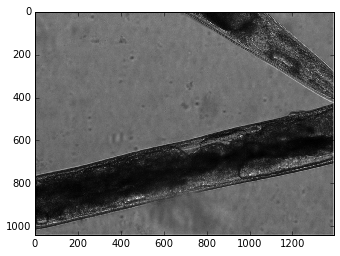

In [11]:
plt.imshow(im, cmap=cm.Greys_r, interpolation='none')

In [12]:
window = SlidingWindow( source_filepath='E16fld53.tif', w=90, h=90, deltax=30, deltay=30, feature_names=fs.feature_names)

In [ ]:
t1 = time.time()
test_img = FeatureSpace.NewFromSlidingWindow( window, n_jobs=True, quiet=False)
t2 = time.time()
print "Feature calculation for {} features in {} positions took {} minutes.".format( fs.num_features, window.num_positions, (t2-t1)/60 )

In [16]:
test_img

<FeatureSpace n_features=120 n_total_samples=1333 n_samples_per_group=1 n_classes=1 samples_per_class=("UNKNOWN": 1333)>

In [17]:
print "Feature calculation for {} features in {} positions took {} minutes.".format( fs.num_features, window.num_positions, (t2-t1)/60 )

Feature calculation for 120 features in 1333 positions took 11.1050894817 minutes.
